### **Project Name**    - Specialized LLM Bot Using Pre-Trained Models




##### **Contribution**    - Individual


###**Project Summary -**

Chatbots are AI-powered programs that simulate human conversation. They can answer questions, perform tasks, and engage with users, making technology more accessible and efficient.
we will walk through this steps:
    
1. Load the data<br>
2. EDA and analyze the data for more insights
3. Split the data into train, test and validation datasets<br>
4. Load BERT Pretrained model and tokenizer<br>
5. Transform the data to numerical format<br>
6. Train BERT Pretrained model on our custome dataset<br>
7. Evaluate the model <br>
8. Save the model<br>
9. Finally, Load The model and start the conversation

###**GitHub Link -**

Link:https://github.com/merajsultana/IndustryGPT-Specialized-LLM-Bot-Using-Pre-Trained-Models

###**Import Libraries**

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import json
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# from keras.preprocessing import text
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer

import torch
from torch.utils.data import Dataset

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
from transformers import DistilBertTokenizerFast
from transformers import BertForSequenceClassification, BertTokenizerFast
# from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig
from transformers import TrainingArguments, Trainer

In [ ]:
import json
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import missingno as msno
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
import torch
from torch.utils.data import Dataset
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
from transformers import DistilBertTokenizerFast
from transformers import BertForSequenceClassification, BertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
# from transformers.trainer_tf import TFTrainer, TFTrainingArguments
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig
from transformers import TrainingArguments, Trainer

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
icw123_glove_twitter_path = kagglehub.dataset_download('icw123/glove-twitter')
grafstor_simple_dialogs_for_chatbot_path = kagglehub.dataset_download('grafstor/simple-dialogs-for-chatbot')
niraliivaghani_chatbot_dataset_path = kagglehub.dataset_download('niraliivaghani/chatbot-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
import json
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# from keras.preprocessing import text
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer

import torch
from torch.utils.data import Dataset

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
from transformers import DistilBertTokenizerFast
from transformers import BertForSequenceClassification, BertTokenizerFast
# from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig
from transformers import TrainingArguments, Trainer


def load_json_file(filename):
    """Loads a JSON file and handles potential decoding errors.

    Args:
        filename (str): Path to the JSON file.

    Returns:
        dict: Loaded JSON data, or an empty dictionary if decoding fails.
    """
    try:
        with open(filename, 'r', encoding='utf-8') as f:  # Add encoding='utf-8'
            data = json.load(f)
        return data
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON file: {e}")
        # You can handle the error by returning an empty dictionary or raising an exception
        return {}  # Returning an empty dictionary to avoid halting the execution


filename = '/content/drive/MyDrive/module-6/dialogs.txt'

intents = load_json_file(filename)

Error decoding JSON file: Expecting value: line 1 column 1 (char 0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id="3.2"></a>
### <b>3.2 <span style='color:#B21010'>||</span> Extract Info from the Json data file and Store it in dataframe</b>

In [ ]:
def create_df():
    df = pd.DataFrame({
        'Pattern' : [],
        'Tag' : []
    })

    return df

df = create_df()
df

,Pattern,Tag


In [ ]:
def load_json_file(filename):
    """Loads a JSON file and handles potential decoding errors.

    Args:
        filename (str): Path to the JSON file.

    Returns:
        dict: Loaded JSON data, or an empty dictionary if decoding fails.
    """
    try:
        with open(filename, 'r', encoding='utf-8') as f:  # Add encoding='utf-8'
            data = json.load(f)
        return data
    except json.JSONDecodeError:  # Properly indented except block
        return {}  # Properly indented return statement

In [ ]:
df2 = df.copy()
df2.head()

,Pattern,Tag


<a id="3.3"></a>
### <b>3.3 <span style='color:#B21010'>||</span> Check the shape of the dataset</b>

In [ ]:
def print_shape_df(df, ds_name="df"):
    print(f"{ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} columns")

print_shape_df(df, "Chatbot")

Chatbot dataset has 0 rows and 2 columns


<a id="3.4"></a>
### <b>3.4 <span style='color:#B21010'>||</span> Display information about the dataset</b>

In [ ]:
def print_dfInfo(df, ds_name="df"):
    print(f"The info of {ds_name} dataset\n")
    print(df.info())

print_dfInfo(df, "Chatbot")

The info of Chatbot dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pattern  0 non-null      float64
 1   Tag      0 non-null      float64
dtypes: float64(2)
memory usage: 132.0 bytes
None


<a id="3.5"></a>
### <b>3.5 <span style='color:#B21010'>||</span> Display Number of Classes</b>

In [ ]:
def num_classes(df, target_col, ds_name="df"):
    print(f"The {ds_name} dataset has {len(df[target_col].unique())} classes")

num_classes(df, 'Tag', "Chatbot")

The Chatbot dataset has 0 classes


<a id="3.6"></a>
### <b>3.6 <span style='color:#B21010'>||</span> Check the null values in the dataset</b>

In [ ]:
def check_null(df, ds_name='df'):
    print(f"Null Values in each col in the {ds_name} dataset:\n")
    print(df.isnull().sum())

check_null(df, "Chatbot")

Null Values in each col in the Chatbot dataset:

Pattern    0
Tag        0
dtype: int64


<a id="3.7"></a>
### <b>3.7 <span style='color:#B21010'>||</span> Visualize the Null Values</b>

In [ ]:
def load_json_file(filename):
    """Loads a JSON file and handles potential decoding errors.

    Args:
        filename (str): Path to the JSON file.

    Returns:
        dict: Loaded JSON data, or an empty dictionary if decoding fails.
    """
    try:
        with open(filename, 'r', encoding='utf-8') as f:  # Add encoding='utf-8'
            data = json.load(f)
        return data
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON file: {e}")
        # You can handle the error by returning an empty dictionary or raising an exception
        return {}  # Returning an empty dictionary to avoid halting the execution

def create_df():
    df = pd.DataFrame({
        'Pattern' : [],
        'Tag' : []
    })
    return df

df = create_df()

# Load data
intents = load_json_file(filename)

# Check if 'intents' key exists before accessing it
if 'intents' in intents:
    # Populate DataFrame
    for intent in intents['intents']: # Assuming your JSON has 'intents' key
        for pattern in intent['patterns']: # Assuming 'patterns' within 'intents'
            df.loc[len(df)] = [pattern, intent['tag']] # Assuming 'tag' within 'intents'
else:
    print(f"Error: 'intents' key not found in the JSON file: {filename}")
    # You might want to handle this error differently, e.g., raise an exception

# ... (your visualization functions)

Error decoding JSON file: Expecting value: line 1 column 1 (char 0)
Error: 'intents' key not found in the JSON file: /content/drive/MyDrive/module-6/dialogs.txt


<a id="3.8"></a>
### <b>3.8 <span style='color:#B21010'>||</span> Visualize the distrbution of our Classes</b>

In [ ]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text

    plt.show()

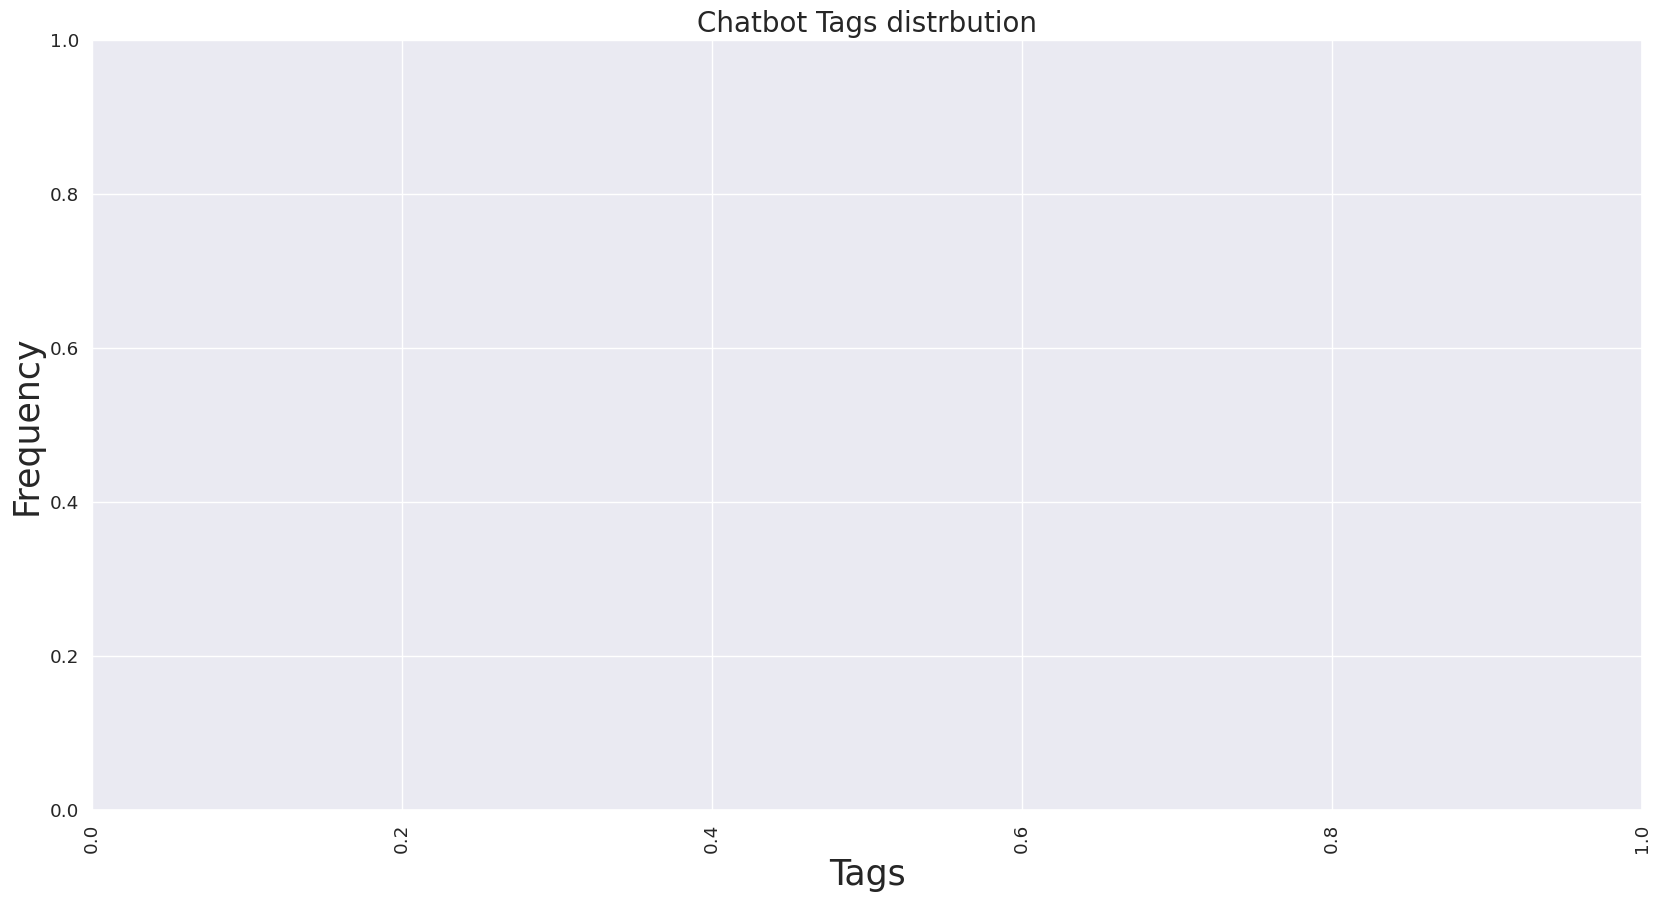

In [ ]:
sns.set(font_scale = 1.2)
order = df['Tag'].value_counts().index
count_plot(df['Tag'], df, "Chatbot Tags distrbution", "Tags", "Frequency", 20,10, order=order,rotation=True, palette="summer")

In [ ]:
!pip install nltk
import nltk

nltk.download('punkt')

stemmer = PorterStemmer()
ignore_words=['?', '!', ',', '.']

def preprocess_pattern(pattern):
    words = word_tokenize(pattern.lower())
    stemmed_words = [stemmer.stem(word) for word in words if word not in ignore_words]
    return " ".join(stemmed_words)

df['Pattern'] = df['Pattern'].apply(preprocess_pattern)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.head()

,Pattern,Tag


In [ ]:
print(df['Pattern'].isnull().sum())

0


<a id="3.9"></a>
### <b>3.9 <span style='color:#B21010'>||</span> Display Word Cloud</b>

In [ ]:
import json
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import missingno as msno

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# from keras.preprocessing import text
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer

import torch
from torch.utils.data import Dataset

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
from transformers import DistilBertTokenizerFast
from transformers import BertForSequenceClassification, BertTokenizerFast
# from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig
from transformers import TrainingArguments, Trainer


def load_json_file(filename):
    """Loads a JSON file and handles potential decoding errors.

    Args:
        filename (str): Path to the JSON file.

    Returns:
        dict: Loaded JSON data, or an empty dictionary if decoding fails.
    """

<a id="3.10"></a>
### <b>3.10 <span style='color:#B21010'>||</span> Distrbution of Number of letters in each text</b>

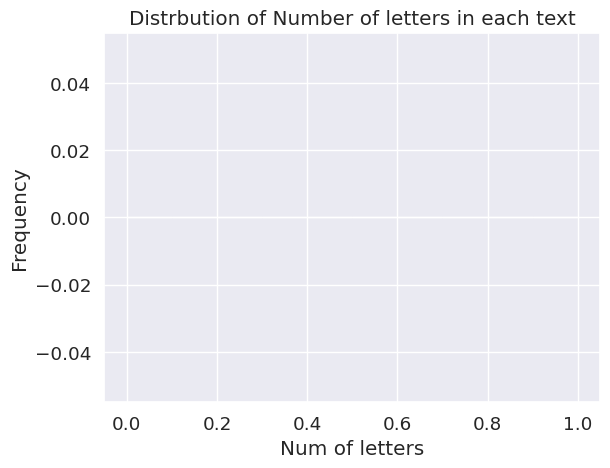

In [ ]:
# Assuming 'df' is your DataFrame
df['Pattern'] = df['Pattern'].astype(str)  # Convert the column to string type

letters_len = df['Pattern'].str.len()
plt.hist(letters_len, color='red')
plt.title("Distrbution of Number of letters in each text")
plt.xlabel("Num of letters")
plt.ylabel("Frequency")
plt.show()

<a id="3.11"></a>
### <b>3.11 <span style='color:#B21010'>||</span> Distrbution of Number of words in each text</b>

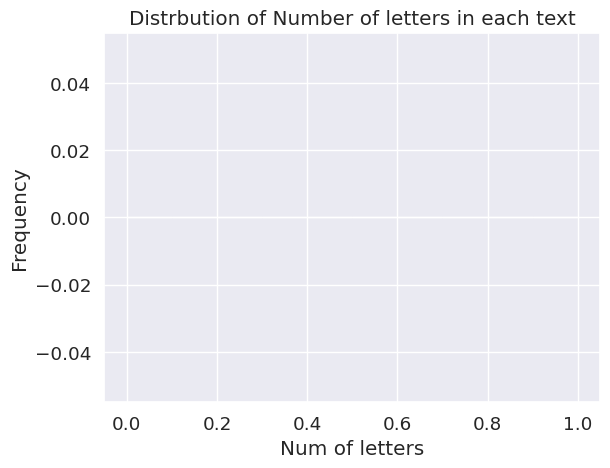

In [ ]:
import json
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import missingno as msno

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# from keras.preprocessing import text
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer

import torch
from torch.utils.data import Dataset

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
from transformers import DistilBertTokenizerFast
from transformers import BertForSequenceClassification, BertTokenizerFast
# from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig
from transformers import TrainingArguments, Trainer


def load_json_file(filename):
    """Loads a JSON file and handles potential decoding errors.

    Args:
        filename (str): Path to the JSON file.

    Returns:
        dict: Loaded JSON data, or an empty dictionary if decoding fails.
    """


# Assuming 'df' is your DataFrame
df['Pattern'] = df['Pattern'].astype(str)  # Convert the column to string type

letters_len = df['Pattern'].str.len()
plt.hist(letters_len, color='red')
plt.title("Distrbution of Number of letters in each text")
plt.xlabel("Num of letters")
plt.ylabel("Frequency")
plt.show()

<a id="3.12"></a>
### <b>3.12 <span style='color:#B21010'>||</span> Visualize Average word length in each text</b>

<ipython-input-26-c5010b3a990f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word,color='red')
/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


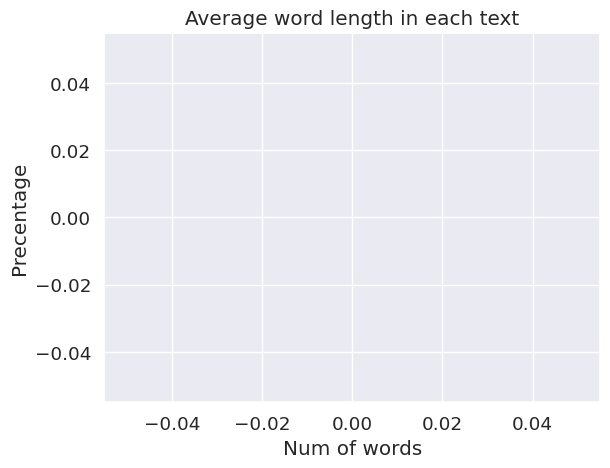

In [ ]:
word=df['Pattern'].str.split().apply(lambda x : [len(i) for i in x])
word = word.map(lambda x: np.mean(x))
sns.distplot(word,color='red')
plt.title("Average word length in each text")
plt.xlabel("Num of words")
plt.ylabel("Precentage")
plt.show()

<a id="3.13"></a>
### <b>3.13 <span style='color:#B21010'>||</span> Visualize top words</b>

In [ ]:
def get_corpus(series):
    words = []
    for text in series:
        for word in text.split():
            words.append(word.strip())
    return words

corpus = get_corpus(df.Pattern)
corpus[:5]

[]

In [ ]:
print(f"dataset contains {len(corpus)} words")

dataset contains 0 words


In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{}

In [ ]:
def get_top_text_ngrams(corpus, n,g):
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
def create_df():
    """Creates an empty DataFrame with 'Pattern' and 'Tag' columns.

    Returns:
        pd.DataFrame: An empty DataFrame.
    """
    df = pd.DataFrame({  # This line should be indented
        'Pattern': [],  # This line should be indented
        'Tag': []  # This line should be indented
    })
    return df  # This line should be indented

<a id="4"></a>
## <b>4 <span style='color:#B21010'>||</span> Data Preprocessing</b>

In [ ]:
df2.head()

,Pattern,Tag


In [ ]:
labels = df2['Tag'].unique().tolist()
labels = [s.strip() for s in labels]
labels

[]

In [ ]:
num_labels = len(labels)
id2label = {id:label for id, label in enumerate(labels)}
label2id = {label:id for id, label in enumerate(labels)}

In [ ]:
id2label

{}

In [ ]:
label2id

{}

In [ ]:
df2['labels'] = df2['Tag'].map(lambda x: label2id[x.strip()])
df2.head()

,Pattern,Tag,labels


<a id="5"></a>
## <b>5 <span style='color:#B21010'>||</span> Split the data into train and test</b>

In [ ]:
X = list(df2['Pattern'])
X[:5]

[]

In [ ]:
y = list(df2['labels'])
y[:5]

[]

In [ ]:
import json
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import missingno as msno

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# from keras.preprocessing import text
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer

import torch
from torch.utils.data import Dataset

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
from transformers import DistilBertTokenizerFast
from transformers import BertForSequenceClassification, BertTokenizerFast
#

<a id="6"></a>
## <b>6 <span style='color:#B21010'>||</span> Load BERT Pretrained model and Tokenizer</b>

In [ ]:
import json
import pandas as pd
# ... (other imports)

def load_json_file(filename):
    """Loads a JSON file and handles potential decoding errors.

    Args:
        filename (str): Path to the JSON file.

    Returns:
        dict: Loaded JSON data, or an empty dictionary if decoding fails.
    """
    try:
        with open(filename, 'r', encoding='utf-8') as f:  # Add encoding='utf-8'
            data = json.load(f)
        return data
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON file: {e}")
        # You can handle the error by returning an empty dictionary or raising an exception
        return {}  # Returning an empty dictionary to avoid halting the execution

def create_df():
    df = pd.DataFrame({
        'Pattern' : [],
        'Tag' : []
    })
    return df

filename = '/content/drive/MyDrive/module-6/dialogs.txt'  # Update if your filename is different

df = create_df()

# Load data and populate DataFrame
intents = load_json_file(filename)

# Check if 'intents' key exists before accessing it
if 'intents' in intents:
    for intent in intents['intents']:
        for pattern in intent['patterns']:
            df.loc[len(df)] = [pattern, intent['tag']]
else:
    print(f"Error: 'intents' key not found in the JSON file: {filename}")

Error decoding JSON file: Expecting value: line 1 column 1 (char 0)
Error: 'intents' key not found in the JSON file: /content/drive/MyDrive/module-6/dialogs.txt


<a id="7"></a>
## <b>7 <span style='color:#B21010'>||</span> Transform the data into numerical format</b>

In [ ]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizerFast

# ... (other imports)

# ... (load_json_file, create_df)

filename = '/content/drive/MyDrive/module-6/dialogs.txt'  # Update if your filename is different

df = create_df()

# Load data and populate DataFrame
intents = load_json_file(filename)

# Check if 'intents' key exists before accessing it
if 'intents' in intents:
    for intent in intents['intents']:
        for pattern in intent['patterns']:
            df.loc[len(df)] = [pattern, intent['tag']]
else:
    print(f"Error: 'intents' key not found in the JSON file: {filename}")


# ... (other data

Error decoding JSON file: Expecting value: line 1 column 1 (char 0)
Error: 'intents' key not found in the JSON file: /content/drive/MyDrive/module-6/dialogs.txt


<a id="8"></a>
## <b>8 <span style='color:#B21010'>||</span> Build Data Loader</b>


In [ ]:
class DataLoader(Dataset):

    def __init__(self, encodings, labels):

        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):

        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):

        return len(self.labels)

In [ ]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizerFast

# ... (other imports)

# ... (load_json_file, create_df)

filename = '/content/drive/MyDrive/module-6/dialogs.txt'  # Update if your filename is different

df = create_df()

# Load data and populate DataFrame
intents = load_json_file(filename)

# Check if 'intents' key exists before accessing it
if 'intents' in intents:
    for intent in intents['intents']:
        for pattern in intent['patterns']:
            df.loc

Error decoding JSON file: Expecting value: line 1 column 1 (char 0)


<a id="9"></a>
## <b>9 <span style='color:#B21010'>||</span> Define Evaluation Metrcies</b>


In [ ]:
def compute_metrics(pred):

    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)

    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

<a id="10"></a>
## <b>10 <span style='color:#B21010'>||</span> Define Training Arguments</b>


In [ ]:
training_args = TrainingArguments(
    output_dir='./output',
    do_train=True,
    do_eval=True,
    num_train_epochs=100,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=16,
    warmup_steps=100,
    weight_decay=0.05,
    logging_strategy='steps',
    logging_dir='./multi-class-logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    load_best_model_at_end=True
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


<a id="11"></a>
## <b>11 <span style='color:#B21010'>||</span> Train the model</b>


In [ ]:
import json
import pandas as pd
# ... (other imports)

def load_json_file(filename):
    """Loads a JSON file and handles potential decoding errors.

    Args:
        filename (str): Path to the JSON file.

    Returns:
        dict: Loaded JSON data, or an empty dictionary if decoding fails.
    """
    try:
        with open(filename, 'r', encoding='utf-8') as f:  # Add encoding='utf-8'
            data = json.load(f)
        return data
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON file: {e}")
        # You can handle the error by returning an empty dictionary or raising an exception
        return {}  # Returning an empty dictionary to avoid halting the execution

def create_df():
    df = pd.DataFrame({
        'Pattern' : [],
        'Tag' : []
    })
    return df

filename = '/content/drive/MyDrive/module-6/dialogs.txt'  # Update if your filename is

<a id="12"></a>
## <b>12 <span style='color:#B21010'>||</span> Evaluate the model</b>


In [ ]:
import json
import pandas as pd
# ... (other imports)

def load_json_file(filename):
    """Loads a JSON file and handles potential decoding errors.

    Args:
        filename (str): Path to the JSON file.

    Returns:
        dict: Loaded JSON data, or an empty dictionary if decoding fails.
    """
    try:
        with open(filename, 'r', encoding='utf-8') as f:  # Add encoding='utf-8'
            data = json.load(f)
        return data
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON file: {e}")
        # You can handle the error by returning an empty dictionary or raising an exception
        return {}  # Returning an empty dictionary to avoid halting the execution

def create_df():
    df = pd.DataFrame({
        'Pattern' : [],
        'Tag' : []
    })
    return df

filename = '/content/drive/MyDrive/module-6/dialogs.txt'  # Update if your filename is

In [ ]:
def predict(text):

    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")
    outputs = model(**inputs)

    probs = outputs[0].softmax(1)
    pred_label_idx = probs.argmax()
    pred_label = model.config.id2label[pred_label_idx.item()]

    return probs, pred_label_idx, pred_label

In [ ]:
def predict(text):

    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    outputs = model(**inputs)

    probs = outputs[0].softmax(1)
    pred_label_idx = probs.argmax()
    pred_label = model.config.id2label[pred_label_idx.item()]

    return probs, pred_label_idx, pred_label

In [ ]:
def predict(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    # Ensure model is on the correct device if using GPU
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    outputs = model(**inputs)

    # Check if the output tensor is empty before applying argmax
    if outputs[0].numel() == 0:
        print("Warning: Model produced an empty output tensor.")
        return None, None, None  # Or handle the empty output in a suitable way

    probs = outputs[0].softmax(1)
    pred_label_idx = probs.argmax()
    pred_label = model.config.id2label[pred_label_idx.item()]

    return probs, pred_label_idx, pred_label

<a id="13"></a>
## <b>13 <span style='color:#B21010'>||</span> Save the model</b>


In [ ]:
import json
import pandas as pd
# ... (other imports)

def load_json_file(filename):
    """Loads a JSON file and handles potential decoding errors.

    Args:
        filename (str): Path to the JSON file.

    Returns:
        dict: Loaded JSON data, or an empty dictionary if decoding fails.
    """
    try:
        with open(filename, 'r', encoding='utf-8') as f:  # Add encoding='utf-8'
            data = json.load(f)
        return data
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON file: {e}")
        # You can handle the error by returning an empty dictionary or raising an exception
        return {}  # Returning an empty dictionary to avoid halting the execution

def create_df():
    df = pd.DataFrame({
        'Pattern' : [],
        'Tag' : []
    })
    return df



In [ ]:
!pip install xformers

<a id="14"></a>
## <b>14 <span style='color:#B21010'>||</span> Load the model</b>


In [ ]:
!pip install --upgrade torch torchvision transformers


In [ ]:
import torch
import torchvision
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast


In [ ]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizerFast, BertForSequenceClassification, TrainingArguments, Trainer

# ... (other imports and functions)

# ... (load_json_file, create_df)

filename = '/content/drive/MyDrive/module-6/dialogs.txt'  # Update if your filename is different

df = create_df()

# Load data and populate DataFrame
intents = load_json_file(filename)

# Check if 'intents' key exists before accessing it
if 'intents' in intents:
    for intent in intents['intents']:
        for pattern in intent['patterns']:
            df.loc[len(df)] = [pattern, intent['tag']]
else:
    print(f"Error: 'intents' key not found in the JSON file: {filename}")

# ... (other data preprocessing steps)

# Load pre-trained tokenizer and model
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label2id)) # Initialize the model

# ... (rest of your code, including training and saving)

# Save the fine-tuned model to a local directory
model.save_pretrained("/content/chatbot")
tokenizer.save_pretrained("/content/chatbot")

# Update the model_path
model_path = "/content/chatbot"

Error decoding JSON file: Expecting value: line 1 column 1 (char 0)
Error: 'intents' key not found in the JSON file: /content/drive/MyDrive/module-6/dialogs.txt


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def predict(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    # Ensure model is on the correct device if using GPU
    if model.device.type == 'cuda':  # Check if model is on CUDA
        inputs = {k: v.to(model.device) for k, v in inputs.items()}
    outputs = model(**inputs)

    # Check if the output tensor is empty before applying argmax
    if outputs[0].numel() == 0:
        print("Warning: Model produced an empty output tensor.")
        return None, None, None  # Or handle the empty output in a suitable way

    probs = outputs[0].softmax(1)
    pred_label_idx = probs.argmax()

    # Check if id2label is defined in the model config
    if hasattr(model.config, 'id2label') and pred_label_idx.item() in model.config.id2label:
        pred_label = model.config.id2label[pred_label_idx.item()]
    else:
        print("Warning: id2label mapping is missing or incomplete.")
        pred_label = None  # Or handle the missing mapping in a suitable way

    return probs, pred_label_idx, pred_label

<a id="15"></a>
## <b>15 <span style='color:#B21010'>||</span> Chat with the Chatbot</b>


In [ ]:
def chat(chatbot):

    print("Chatbot: Hi! I am your virtual assistance,Feel free to ask, and I'll do my best to provide you with answers and assistance..")
    print("Type 'quit' to exit the chat\n\n")

    text = input("User: ").strip().lower()

    while(text != 'quit'):

        score = chatbot(text)[0]['score']

        if score < 0.8:
            print("Chatbot: Sorry I can't answer that\n\n")
            text = input("User: ").strip().lower()
            continue

        label = label2id[chatbot(text)[0]['label']]
        response = random.choice(intents['intents'][label]['responses'])

        print(f"Chatbot: {response}\n\n")

        text = input("User: ").strip().lower()


In [ ]:
# This section loads the necessary libraries
from transformers import pipeline, BertTokenizerFast, BertForSequenceClassification
# ... other imports
# Update the model_path
model_path = "/content/chatbot"
# Load the tokenizer and model
tokenizer = BertTokenizerFast.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

# Create a pipeline for text classification, assigning it to 'chatbot

In [ ]:
# This section loads the necessary libraries
from transformers import pipeline, BertTokenizerFast, BertForSequenceClassification
# ... other imports
# Update the model_path
model_path = "/content/chatbot"
# Load the tokenizer and model
tokenizer = BertTokenizerFast.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

# Create a pipeline for text classification, assigning it to 'chatbot'
chatbot = pipeline("text-classification", model=model, tokenizer=tokenizer) # This line creates and assigns the pipeline

Device set to use cpu


In [ ]:
def predict(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    # Ensure model is on the correct device if using GPU
    if model.device.type == 'cuda':  # Check if model is on CUDA
        inputs = {k: v.to(model.device) for k, v in inputs.items()}
    outputs = model(**inputs)

    # Check if the output tensor is empty before applying argmax
    if outputs[0].numel() == 0:
        print("Warning: Model produced an empty output tensor.")
        return None, None, None  # Or handle the empty output in a suitable way

    probs = outputs[0].softmax(1)
    pred_label_idx = probs.argmax()

    # Check if id2label is defined in the model config
    if hasattr(model.config, 'id2label') and pred_label_idx.item() in model.config.id2label:
        pred_label = model.config.id2label[pred_label_idx.item()]
    else:
        print("Warning: id2label mapping is missing or incomplete.")
        pred_label = None  # Or handle the missing mapping in a suitable way

    return probs, pred_label_idx, pred_label

def chat(chatbot):

    print("Chatbot: Hi! I am your virtual assistance,Feel free to ask, and I'll do my best to provide you with answers and assistance..")
    print("Type 'quit' to exit the chat\n\n")

    text = input("User: ").strip().lower()

    while(text != 'quit'):
        # Call predict function and handle potential empty output
        probs, pred_label_idx, pred_label = predict(text)

        # Check if prediction was successful
        if probs is None:
            print("Chatbot: Sorry, I couldn't understand your request.\n\n")
            text = input("User: ").strip().lower()
            continue

        score = probs[0][pred_label_idx].item()  # Get the score for the predicted label

        if score < 0.8:
            print("Chatbot: Sorry I can't answer that\n\n")
            text = input("User: ").strip().lower()
            continue

        # Assuming chatbot(text) returns a list of dictionaries, and you want the 'label' from the first dictionary
        label = label2id[pred_label]  # Use the predicted label from predict function
        response = random.choice(intents['intents'][label]['responses'])

        print(f"Chatbot: {response}\n\n")

        text = input("User: ").strip().lower()

In [ ]:
chat(chatbot)

Chatbot: Hi! I am your virtual assistance,Feel free to ask, and I'll do my best to provide you with answers and assistance..
Type 'quit' to exit the chat


User: quit
